<a href="https://colab.research.google.com/github/SunnyD50/Control-Substance-Overprescription-Tracker-/blob/main/sunday_backpain0project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 61.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 1.5.3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
## uploading data
backpain = pd.read_csv('/content/drive/MyDrive/backpain.csv')

In [5]:
backpain.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [6]:
backpain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [7]:
backpain.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [8]:
backpain.isnull().sum()

,0
pelvic_incidence,0
pelvic tilt,0
lumbar_lordosis_angle,0
sacral_slope,0
pelvic_radius,0
degree_spondylolisthesis,0
pelvic_slope,0
Direct_tilt,0
thoracic_slope,0
cervical_tilt,0


In [53]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171


In [9]:
# checking for duplicate values
backpain.duplicated().sum()

0

In [10]:
X = backpain.drop(["Status"], axis=1)
y = backpain["Status"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 217
Number of rows in test data = 93


In [13]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Status
Abnormal    0.663594
Normal      0.336406
Name: proportion, dtype: float64
Percentage of classes in test set:
Status
Abnormal    0.709677
Normal      0.290323
Name: proportion, dtype: float64


In [14]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [20]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, pos_label='Abnormal')  # to compute Recall
    precision = precision_score(target, pred, pos_label='Abnormal')  # to compute Precision
    f1 = f1_score(target, pred, pos_label='Abnormal')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [16]:
model0 = DecisionTreeClassifier(criterion="gini", random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

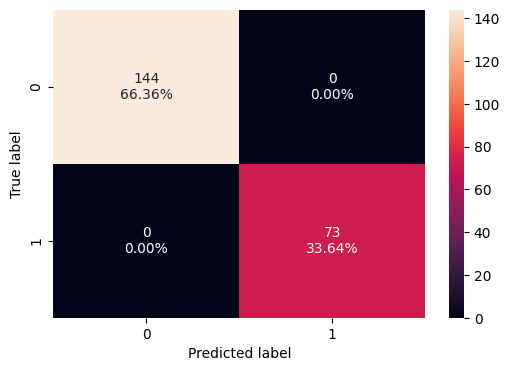

In [54]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [55]:
# prompt: Checking model performance on training set

train_perf_gini = model_performance_classification_sklearn(
    model0, X_train, y_train
)
print("Training performance:\n", train_perf_gini)


Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [22]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


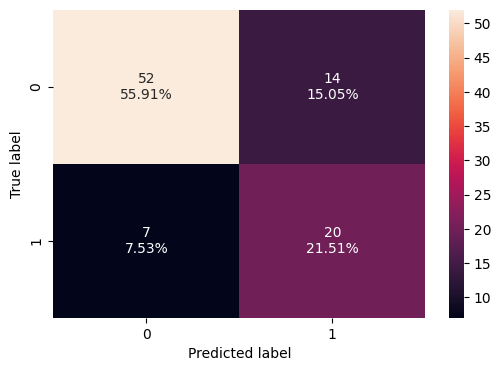

In [23]:
##Checking model performance on test set
confusion_matrix_sklearn(model0, X_test, y_test)

In [24]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.774194,0.787879,0.881356,0.832


In [56]:
##Visualizing the Decision Tree
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']


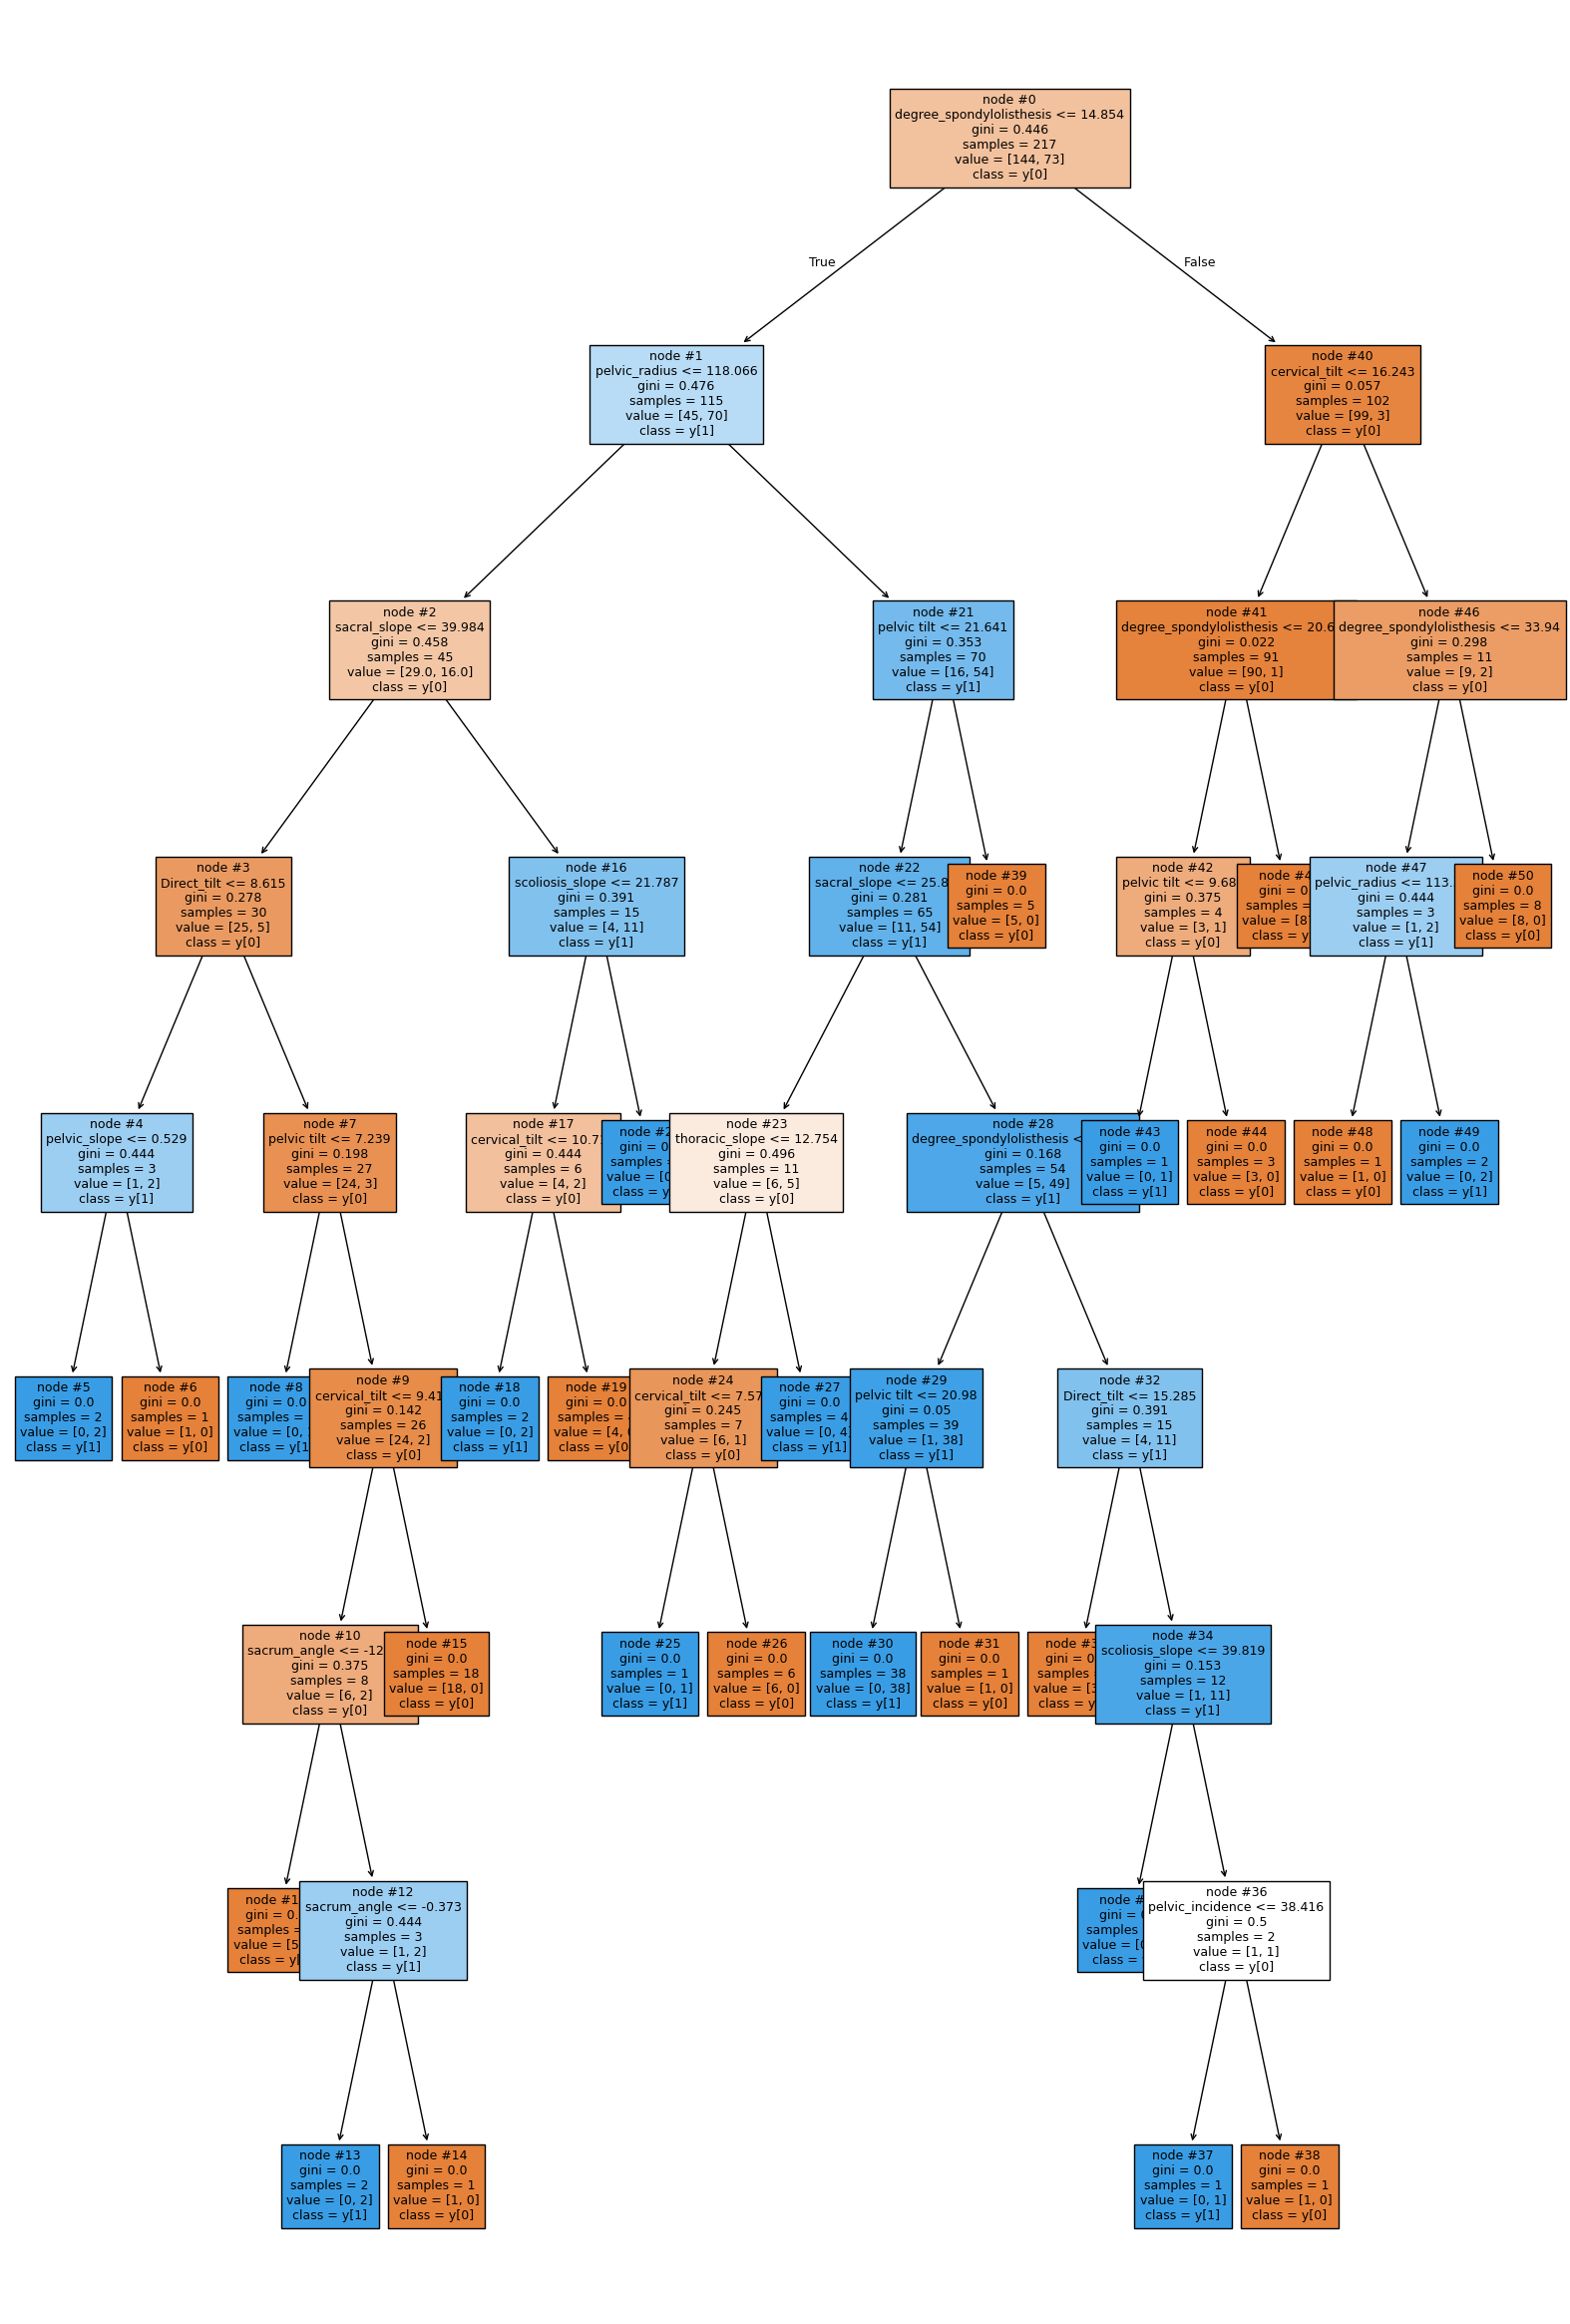

In [27]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [28]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- degree_spondylolisthesis <= 14.85
|   |--- pelvic_radius <= 118.07
|   |   |--- sacral_slope <= 39.98
|   |   |   |--- Direct_tilt <= 8.62
|   |   |   |   |--- pelvic_slope <= 0.53
|   |   |   |   |   |--- weights: [0.00, 2.00] class: Normal
|   |   |   |   |--- pelvic_slope >  0.53
|   |   |   |   |   |--- weights: [1.00, 0.00] class: Abnormal
|   |   |   |--- Direct_tilt >  8.62
|   |   |   |   |--- pelvic tilt <= 7.24
|   |   |   |   |   |--- weights: [0.00, 1.00] class: Normal
|   |   |   |   |--- pelvic tilt >  7.24
|   |   |   |   |   |--- cervical_tilt <= 9.42
|   |   |   |   |   |   |--- sacrum_angle <= -12.82
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: Abnormal
|   |   |   |   |   |   |--- sacrum_angle >  -12.82
|   |   |   |   |   |   |   |--- sacrum_angle <= -0.37
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: Normal
|   |   |   |   |   |   |   |--- sacrum_angle >  -0.37
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] clas

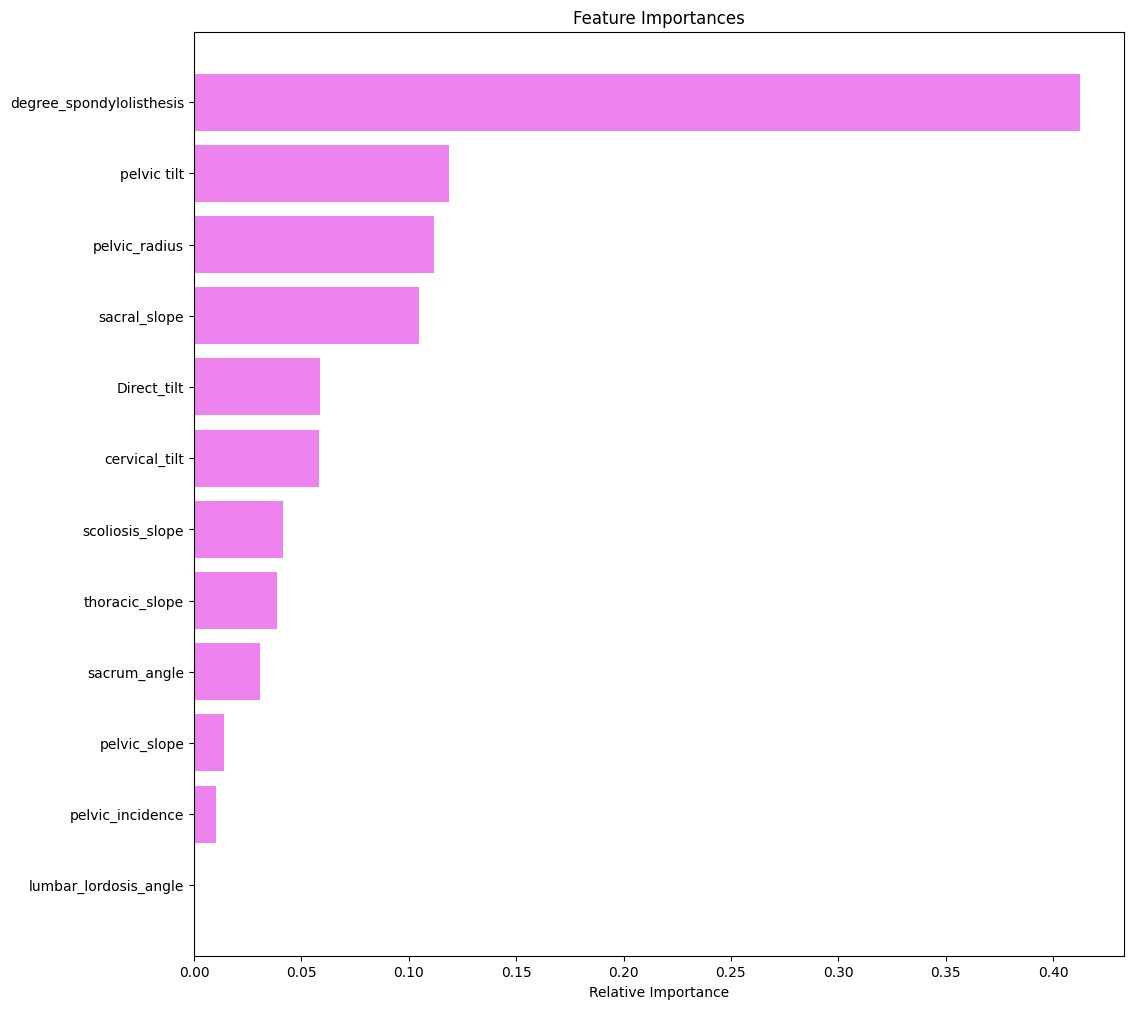

In [29]:
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [60]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred, pos_label='Abnormal')
            test_recall_score = recall_score(y_test, y_test_pred, pos_label='Abnormal')
# Print the results
print(f"Train Recall: {train_recall_score:.4f}")
print(f"Test Recall: {test_recall_score:.4f}")
 # Calculate the absolute difference between training and test recall scores
# Update the best estimator and best score if the current one has a smaller score difference
if (test_recall_score > best_test_score):
                best_test_score = test_recall_score
                best_estimator = estimator
# Calculate the absolute difference between training and test recall scores
score_diff = abs(train_recall_score - test_recall_score)
 # Calculate the absolute difference between training and test recall scores
score_diff = abs(train_recall_score - test_recall_score)

# Update the best estimator and best score if the current one has a smaller score difference
if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# creating an instance of the best model
model1 = best_estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Train Recall: 0.7222
Test Recall: 0.7273
Best parameters found:
Max depth: 6
Max leaf nodes: 250
Min samples split: 70
Best test recall score: 0.7272727272727273


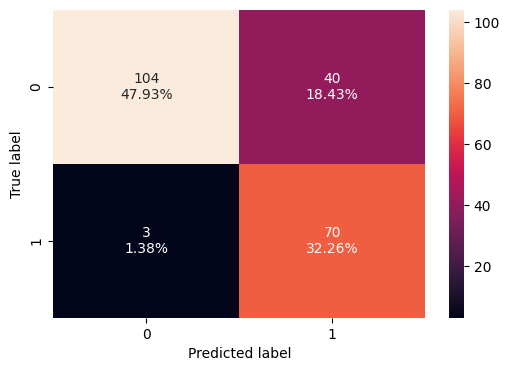

In [61]:
##Checking performance on training set
confusion_matrix_sklearn(model1, X_train, y_train)

In [62]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.801843,0.722222,0.971963,0.828685


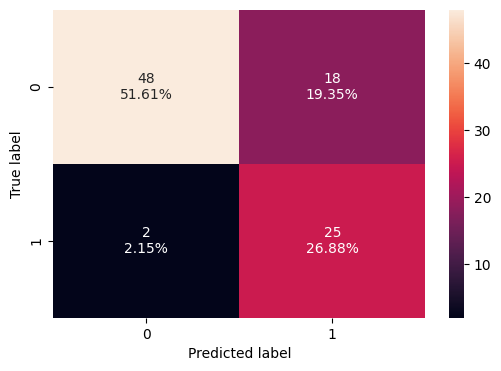

In [63]:
##Checking model performance on test set
confusion_matrix_sklearn(model1, X_test, y_test)

In [64]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.784946,0.727273,0.96,0.827586


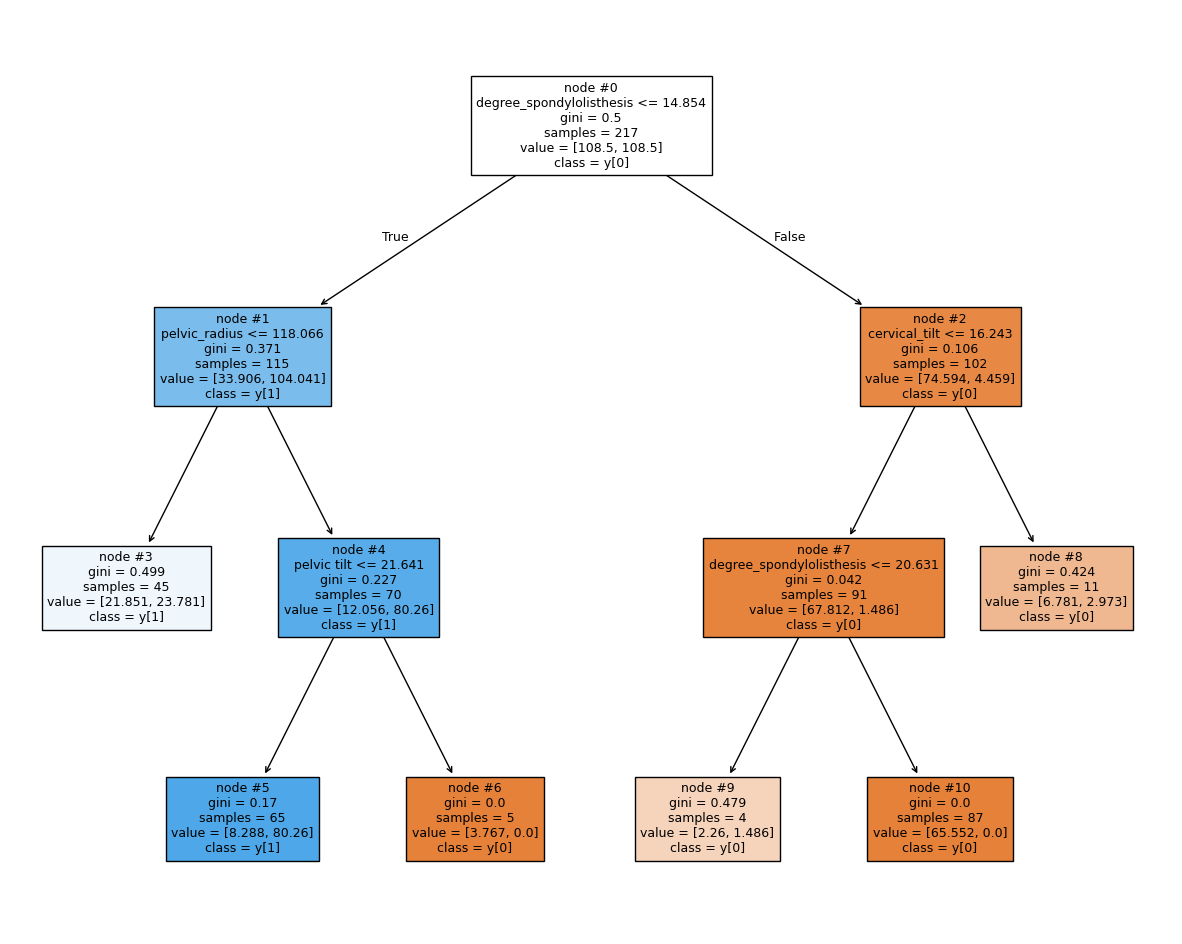

In [65]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

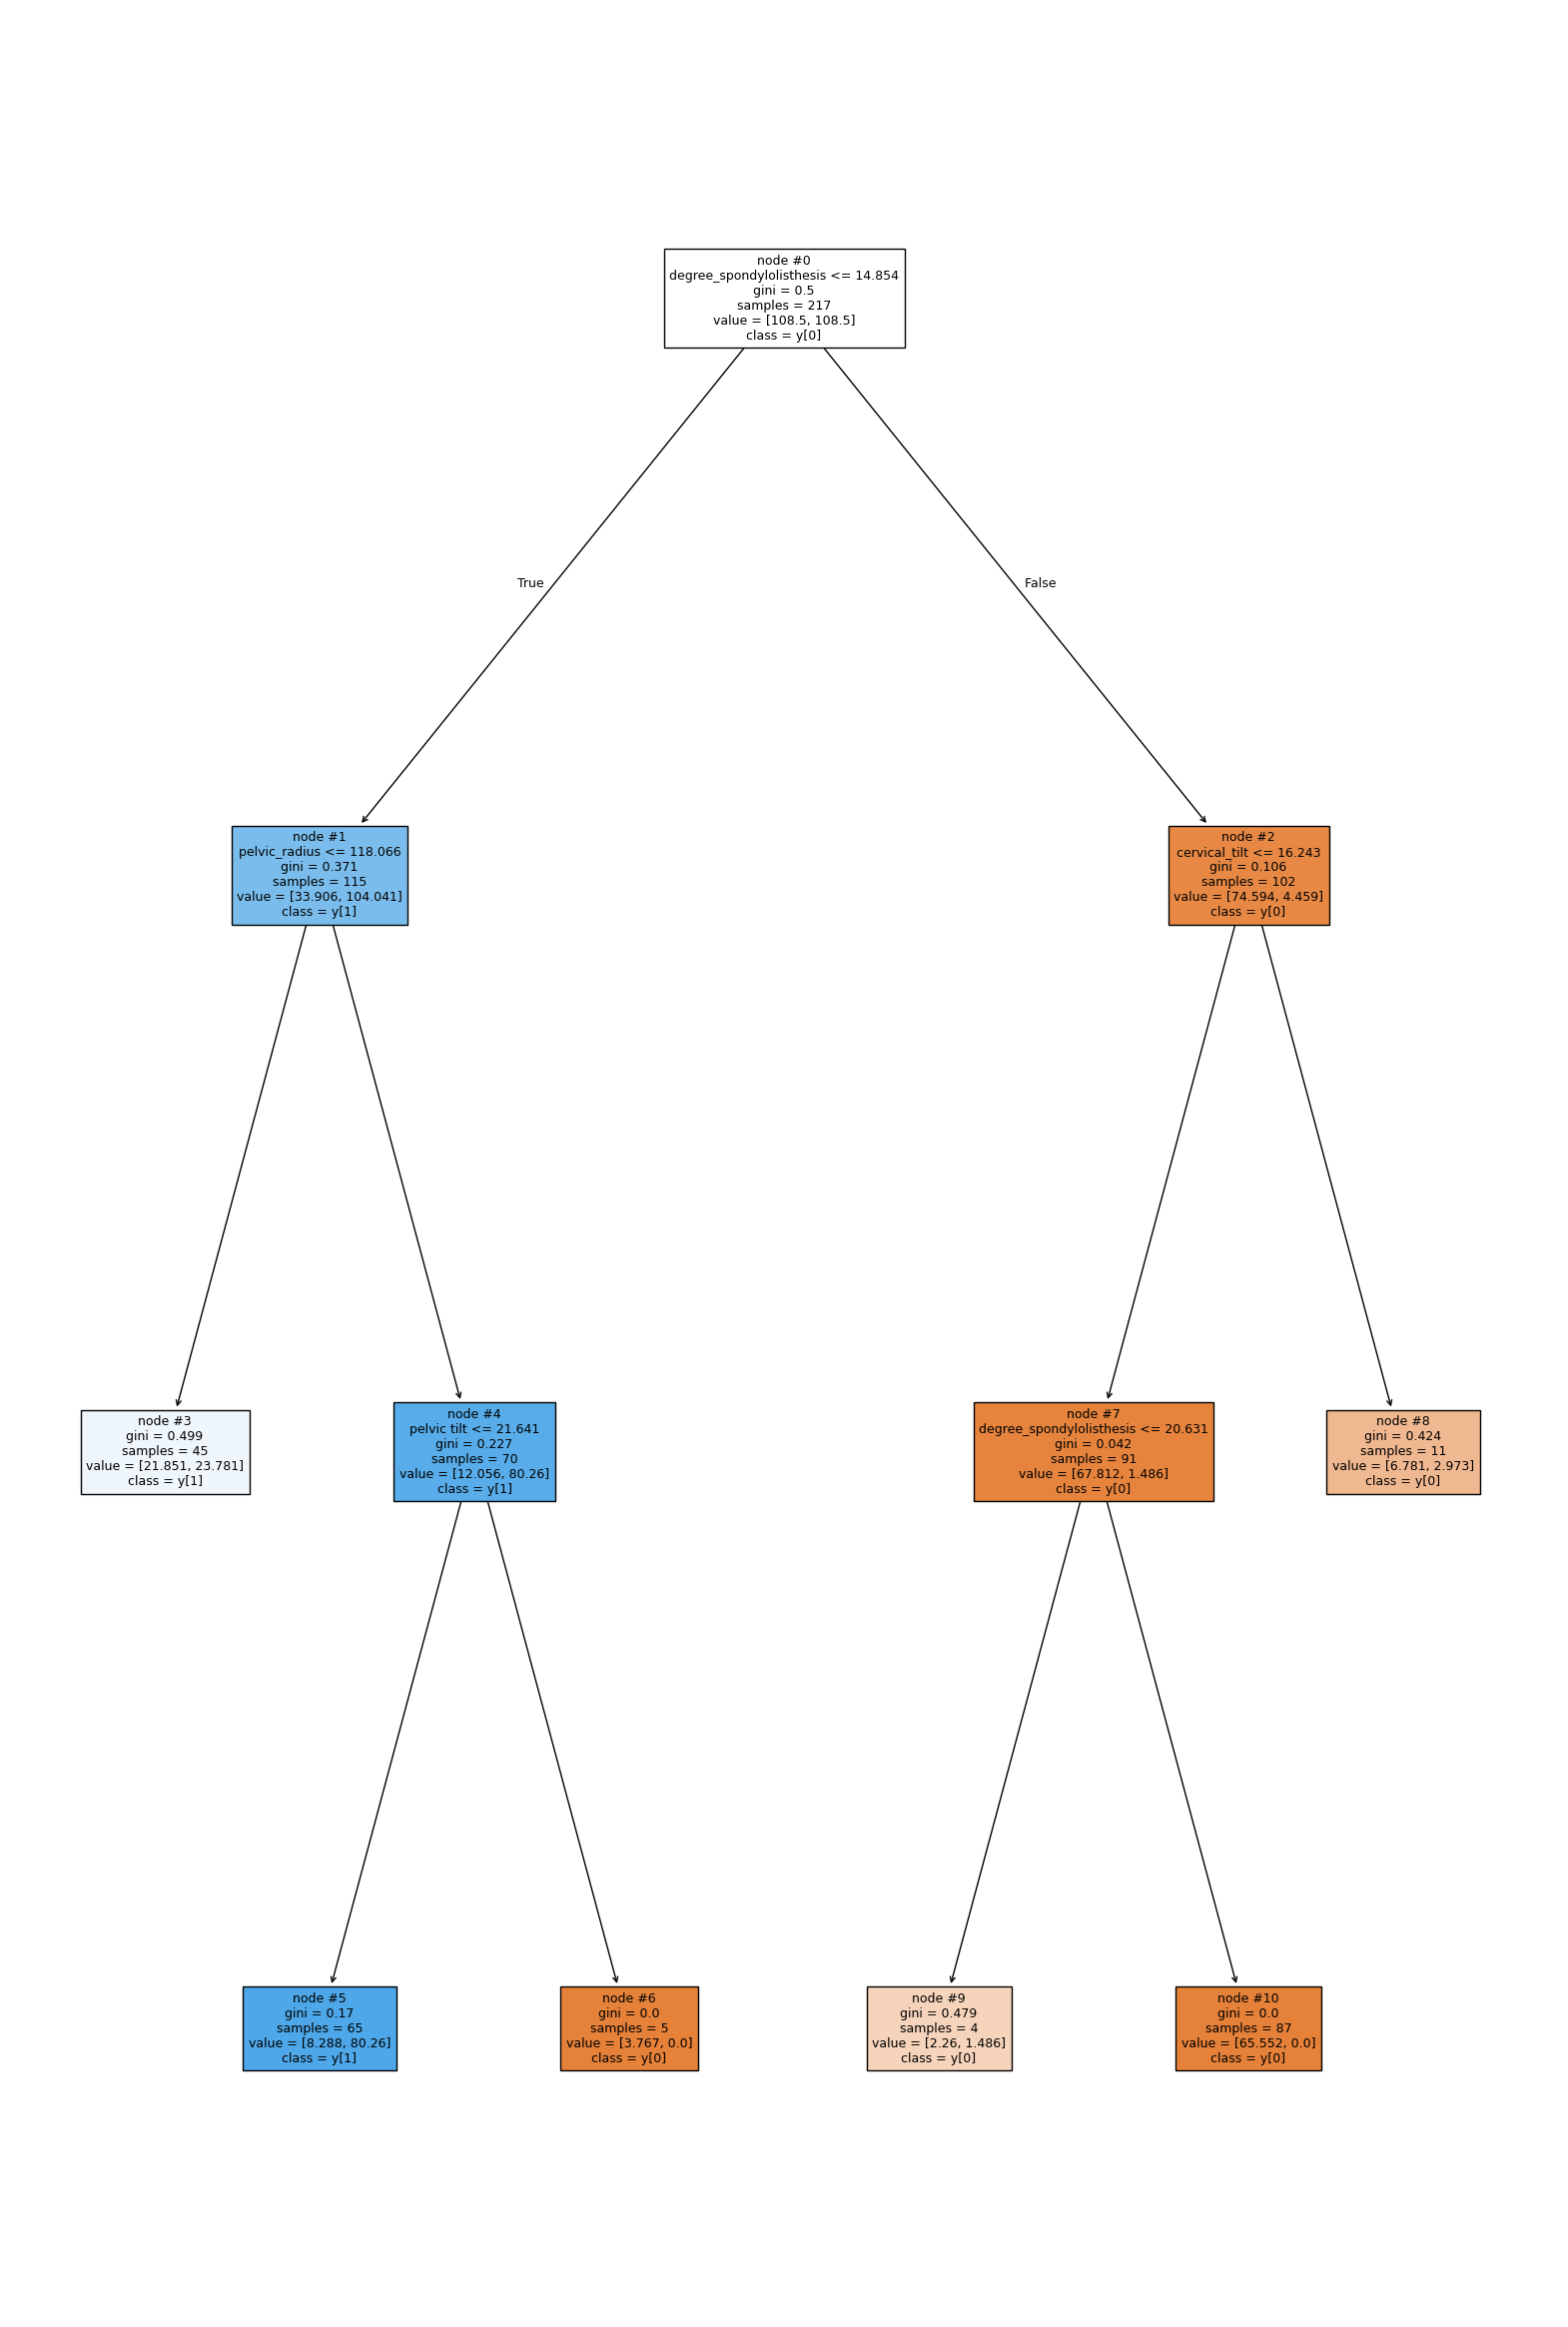

In [66]:
##Visualizing the Decision Tree
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [67]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- degree_spondylolisthesis <= 14.85
|   |--- pelvic_radius <= 118.07
|   |   |--- weights: [21.85, 23.78] class: Normal
|   |--- pelvic_radius >  118.07
|   |   |--- pelvic tilt <= 21.64
|   |   |   |--- weights: [8.29, 80.26] class: Normal
|   |   |--- pelvic tilt >  21.64
|   |   |   |--- weights: [3.77, 0.00] class: Abnormal
|--- degree_spondylolisthesis >  14.85
|   |--- cervical_tilt <= 16.24
|   |   |--- degree_spondylolisthesis <= 20.63
|   |   |   |--- weights: [2.26, 1.49] class: Abnormal
|   |   |--- degree_spondylolisthesis >  20.63
|   |   |   |--- weights: [65.55, 0.00] class: Abnormal
|   |--- cervical_tilt >  16.24
|   |   |--- weights: [6.78, 2.97] class: Abnormal



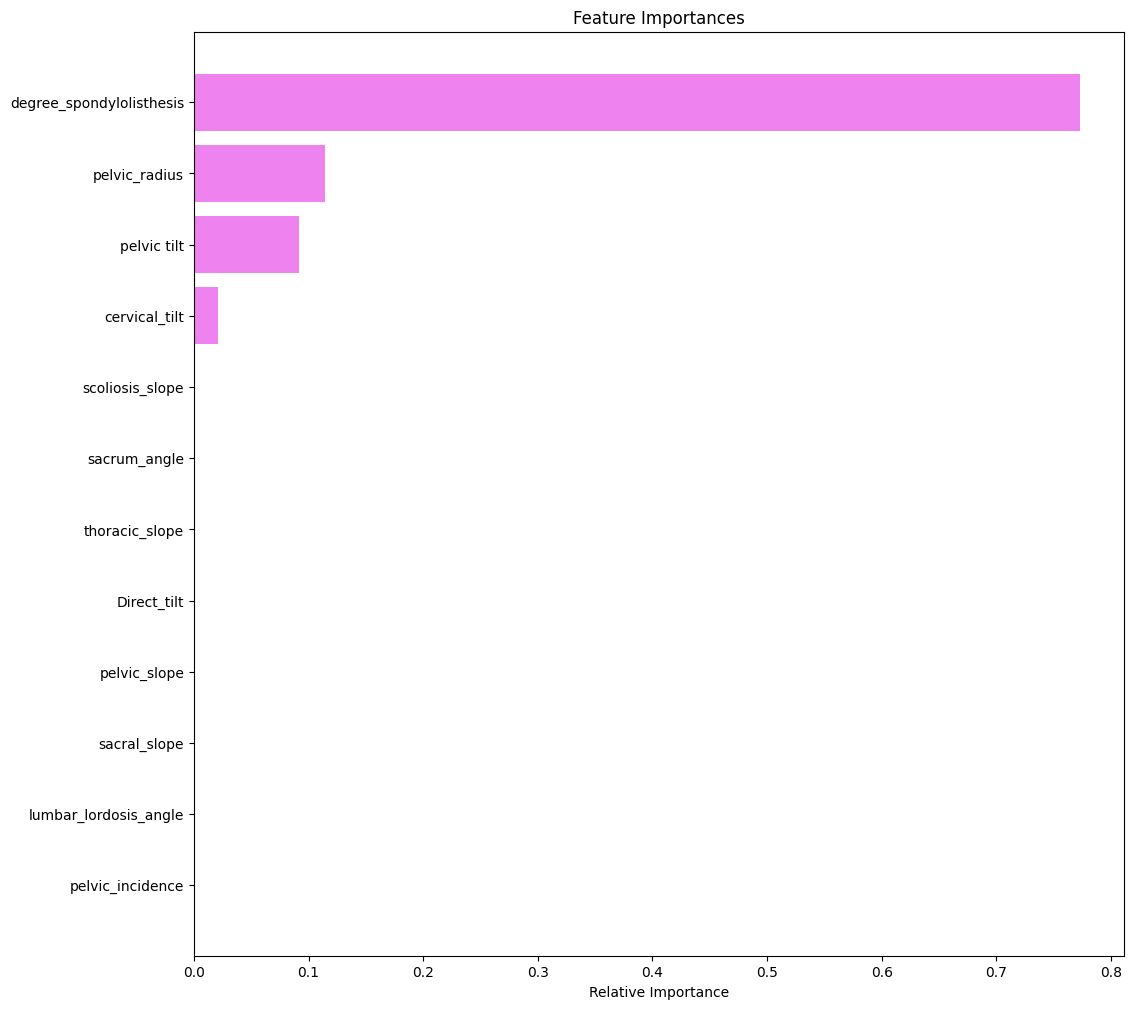

In [68]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [69]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.004224,0.008449
2,0.004558,0.017564
3,0.005672,0.034579
4,0.005907,0.052300
5,0.006144,0.058445
6,0.007562,0.066007
7,0.007680,0.073688
8,0.007900,0.081587
9,0.008980,0.090568


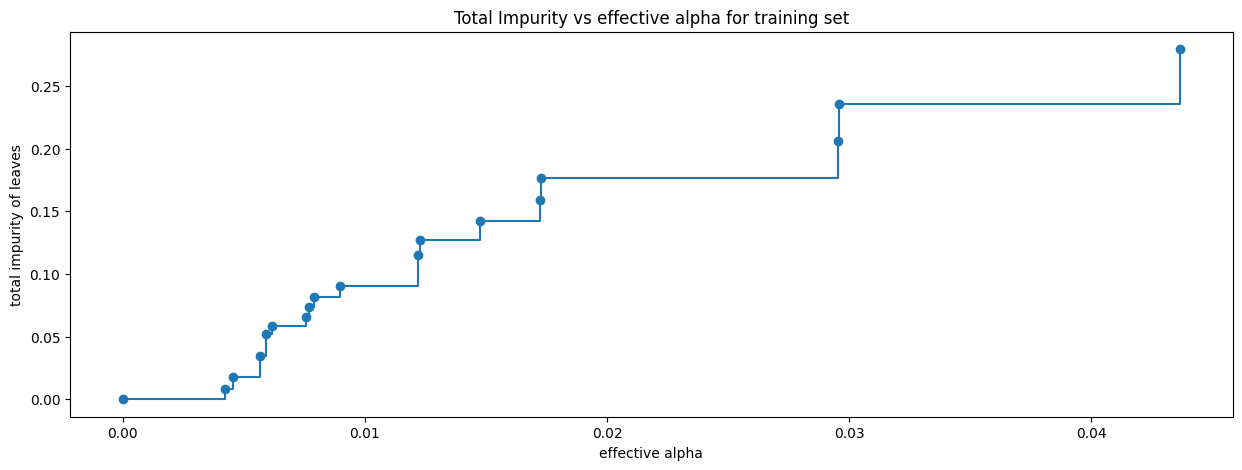

In [70]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [71]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16718273972032832


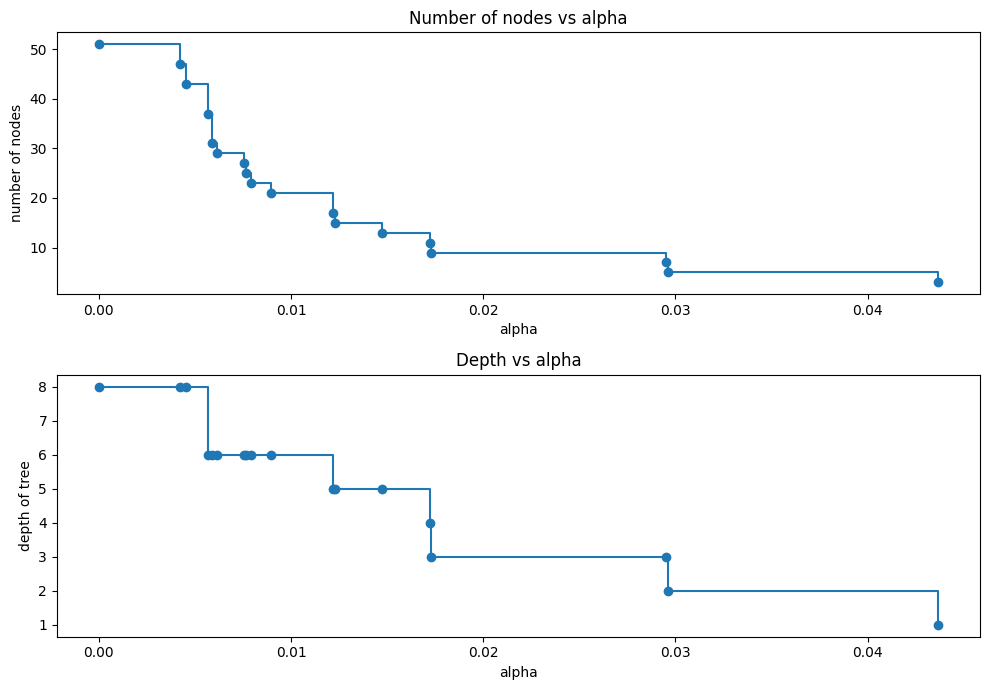

In [72]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [74]:
# prompt: recall_train = []

recall_train = []
for clf in clfs:
    train_pred = clf.predict(X_train)
    recall_train.append(recall_score(y_train, train_pred, pos_label='Abnormal'))


In [76]:
# prompt: recall_test = []

for clf in clfs:
    test_pred = clf.predict(X_test)
    recall_test.append(recall_score(y_test, test_pred, pos_label='Abnormal'))


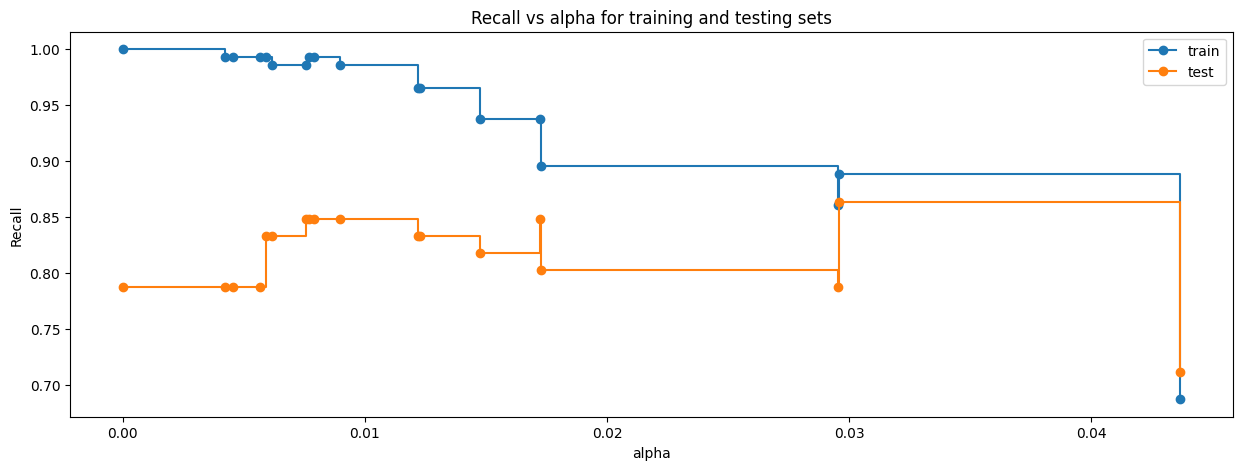

In [77]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [78]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.029595494111623127, random_state=1)


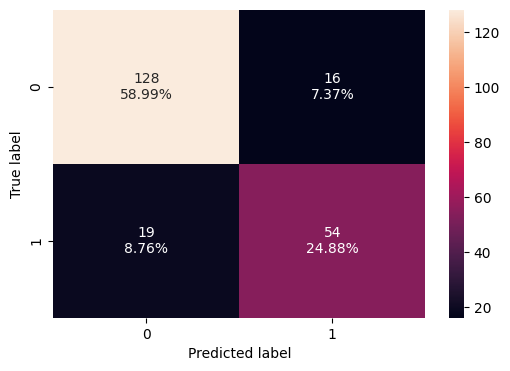

In [79]:
##Checking model performance on training set
model3 = best_model
confusion_matrix_sklearn(model3, X_train, y_train)

In [80]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    model3, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.83871,0.888889,0.870748,0.879725


In [81]:
##Checking model performance on test set
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    model3, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.827957,0.863636,0.890625,0.876923


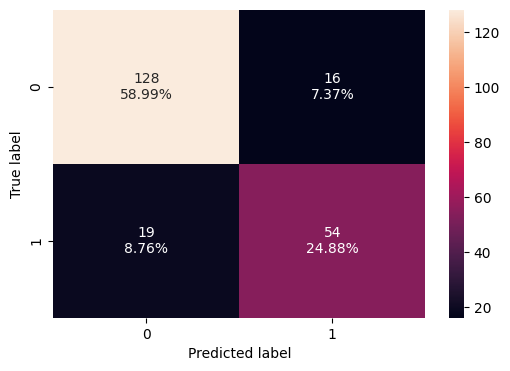

In [82]:
confusion_matrix_sklearn(model3, X_train, y_train)

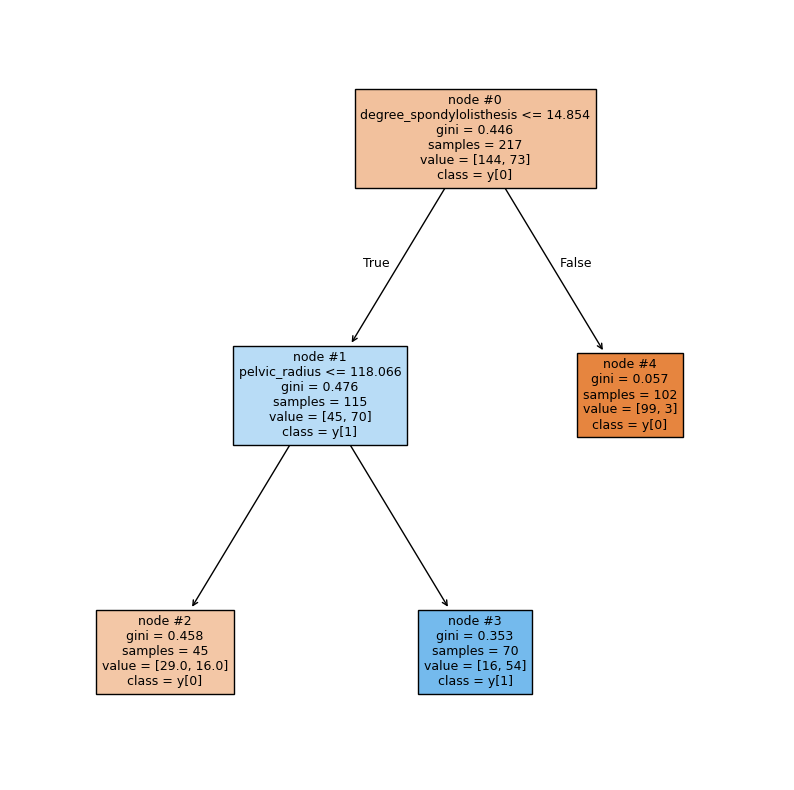

In [83]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [84]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model3, feature_names=feature_names, show_weights=True))

|--- degree_spondylolisthesis <= 14.85
|   |--- pelvic_radius <= 118.07
|   |   |--- weights: [29.00, 16.00] class: Abnormal
|   |--- pelvic_radius >  118.07
|   |   |--- weights: [16.00, 54.00] class: Normal
|--- degree_spondylolisthesis >  14.85
|   |--- weights: [99.00, 3.00] class: Abnormal



In [85]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model3.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                               Imp
degree_spondylolisthesis  0.792918
pelvic_radius             0.207082
pelvic_incidence          0.000000
pelvic tilt               0.000000
lumbar_lordosis_angle     0.000000
sacral_slope              0.000000
pelvic_slope              0.000000
Direct_tilt               0.000000
thoracic_slope            0.000000
cervical_tilt             0.000000
sacrum_angle              0.000000
scoliosis_slope           0.000000


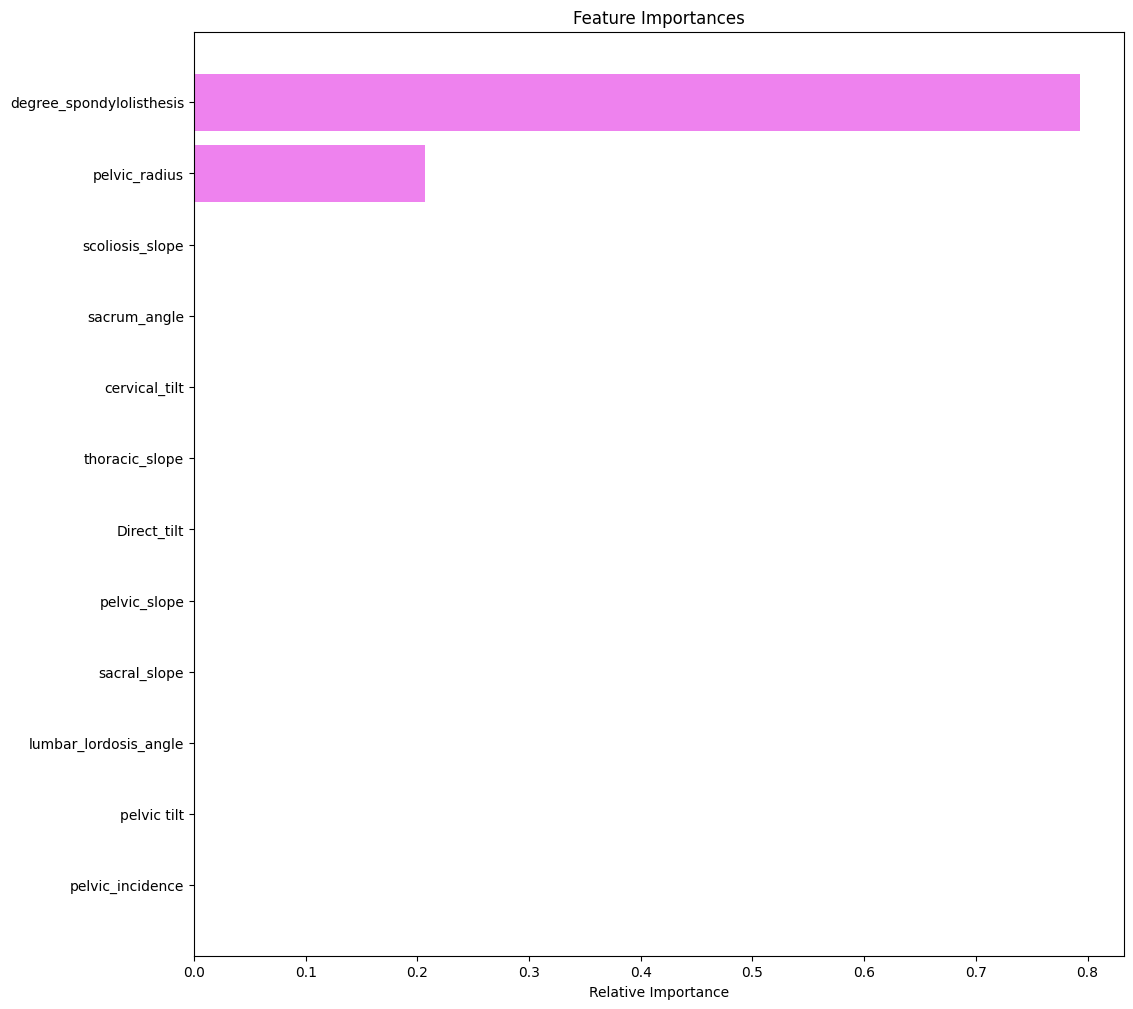

In [86]:
importances = model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [87]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.801843,0.838710
Recall,1.0,0.722222,0.888889
Precision,1.0,0.971963,0.870748
F1,1.0,0.828685,0.879725


In [88]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.774194,0.784946,0.827957
Recall,0.787879,0.727273,0.863636
Precision,0.881356,0.960000,0.890625
F1,0.832000,0.827586,0.876923
